In [1]:
import csv
import time
import pandas as pd
import string

from nltk.corpus import stopwords

import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

import re
from collections import Counter
from string import punctuation

from wordcloud import WordCloud 

from textblob import TextBlob

In [3]:
col_names=["index","keyword",'Post','Score','Comments','link','domain','url','postid','subreddit','Date']

df = pd.read_csv('newdata.csv', names=col_names)

df.head()
#df.count()

,index,keyword,Post,Score,Comments,link,domain,url,postid,subreddit,Date
0,1,modi,[R] Megathread II: India-Pakistan Border Skirmish,394,5408,https://www.reddit.com/r/india/comments/avghfn...,self.india,/r/india/comments/avghfn/r_megathread_ii_india...,avghfn,india,02-27-2019
1,2,modi,Trump used accent to imitate India's prime min...,26074,3631,http://thehill.com/homenews/administration/370...,thehill.com,/r/worldnews/comments/7s6k5t/trump_used_accent...,7s6k5t,worldnews,01-22-2018
2,3,modi,Indian Prime Minister Narendra Modi told Germa...,58611,3242,http://in.reuters.com/article/us-germany-india...,in.reuters.com,/r/worldnews/comments/6efgnz/indian_prime_mini...,6efgnz,worldnews,05-31-2017
3,4,modi,[R] Megathread III: India-Pakistan Border Skir...,218,2734,https://www.reddit.com/r/india/comments/aw38i5...,self.india,/r/india/comments/aw38i5/r_megathread_iii_indi...,aw38i5,india,03-01-2019
4,5,modi,Modi: From Nov 8 to abolish 500 and 1000 Rupee...,2917,1744,https://www.reddit.com/r/india/comments/5btlxy...,self.india,/r/india/comments/5btlxy/modi_from_nov_8_to_ab...,5btlxy,india,11-08-2016


In [4]:
df = df.drop_duplicates('postid')
df.shape

(2114, 11)

In [5]:
df = df.filter(['Post','Score','Comments','Date'], axis=1)
df.head()

,Post,Score,Comments,Date
0,[R] Megathread II: India-Pakistan Border Skirmish,394,5408,02-27-2019
1,Trump used accent to imitate India's prime min...,26074,3631,01-22-2018
2,Indian Prime Minister Narendra Modi told Germa...,58611,3242,05-31-2017
3,[R] Megathread III: India-Pakistan Border Skir...,218,2734,03-01-2019
4,Modi: From Nov 8 to abolish 500 and 1000 Rupee...,2917,1744,11-08-2016


In [6]:
#extract the tweet with more FAVs and more RTs:

fav_max = np.max(df['Score'])
rt_max = np.max(df['Comments'])

fav = df[df.Score == fav_max].index[0]
rt = df[df.Comments == rt_max].index[0]

# Max FAVs:
print("\nThe tweet with more likes is: \n{}".format(df['Post'][fav]))
print("Number of likes: {}".format(fav_max))
#print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("\nThe tweet with more retweets is: \n{}".format(df['Post'][rt]))
print("Number of retweets: {}".format(rt_max))
#print("{} characters.\n".format(data['len'][rt]))


The tweet with more likes is: 
Indian Prime Minister Narendra Modi told German Chancellor Angela Merkel in talks in Berlin on Tuesday that India would stay in the Paris climate accord even if the United States pulled out
Number of likes: 58611

The tweet with more retweets is: 
[R] Megathread II: India-Pakistan Border Skirmish
Number of retweets: 5408


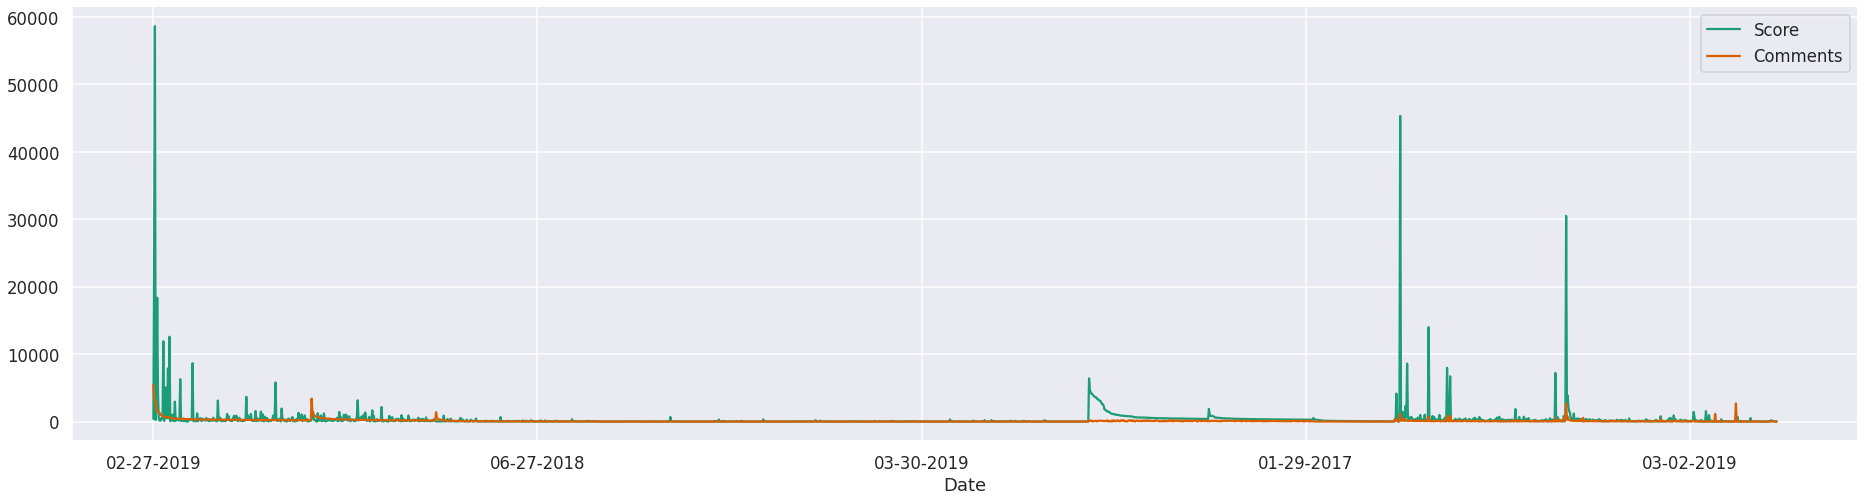

In [7]:
# Create time series for the data:

#tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=df['Score'].values, index=df['Date'])
tret = pd.Series(data=df['Comments'].values, index=df['Date'])

# Likes vs retweets visualization:
tfav.plot(figsize=(32,8), label="Score", legend=True)
tret.plot(figsize=(32,8), label="Comments", legend=True)

In [8]:
df['Score'].corr(df['Comments'])

0.48313614932545496

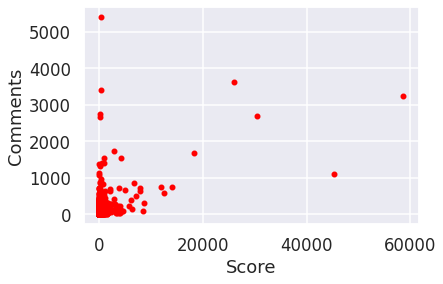

In [9]:
df.plot.scatter(x='Score',y='Comments',c='r')

In [11]:
col_names=["Sub ID","Comment ID",'Comment','score','subreddit','Date']

df = pd.read_csv('newc.csv', names=col_names)

df.head()
#df.count()

,Sub ID,Comment ID,Comment,score,subreddit,Date
0,avghfn,ehezjqx,Though most of the users probably are familiar...,1,india,02-27-2019
1,avghfn,ehexxze,My parents live near the border area. They sai...,65,india,02-27-2019
2,avghfn,ehfyqe8,Jets flying really close to Islamabad right no...,51,india,02-28-2019
3,avghfn,eheygig,I feel for the brave wing commander. Being cap...,46,india,02-27-2019
4,avghfn,ehey8v5,I switched on Republic TV just to check out wh...,158,india,02-27-2019


In [12]:
df.shape

(69561, 6)

In [ ]:
df = df.drop_duplicates('Comment')
df.shape

In [ ]:
# Sort dataframe by date column
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date',ascending=True)
df = df.reset_index().drop('index',axis=1)
df.head()

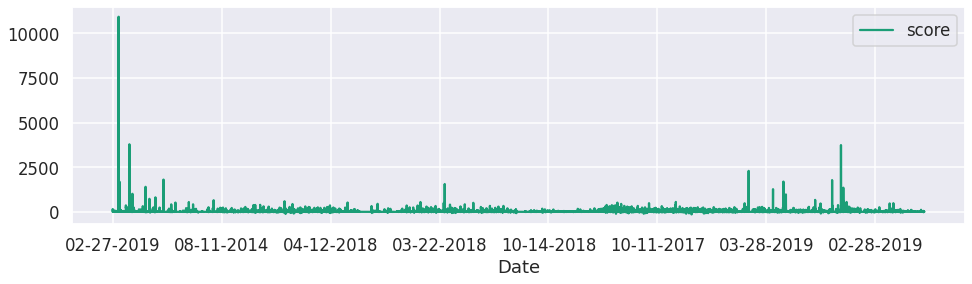

In [14]:
# Create time series for the data:

#tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=df['score'].values, index=df['Date'])
#tret = pd.Series(data=df['retweets'].values, index=df['date'])

# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="score", legend=True)
#tret.plot(figsize=(32,8), label="Retweets", legend=True)

In [15]:
#extract the tweet with more FAVs and more RTs:

fav_max = np.max(df['score'])
#rt_max = np.max(df['retweets'])

fav = df[df.score == fav_max].index[0]
#rt = df[df.retweets == rt_max].index[0]

# Max FAVs:
print("\nThe comment with more score is: \n{}".format(df['Comment'][fav]))
print("Number of likes: {}".format(fav_max))
#print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
#print("\nThe tweet with more retweets is: \n{}".format(df['text'][rt]))
#print("Number of retweets: {}".format(rt_max))
#print("{} characters.\n".format(data['len'][rt]))


The comment with more score is: 
I never understood how it makes sense for people, who speak only one language, to make fun of people who can speak 2 or 3.


EDIT: Thanks for the engagement people. I wanted to add a note regarding jokes. Some people have pointed out that it should be okay to joke about accents and I totally agree; The main issue is not taking people seriously because of an accent.
This comment by u/zh1K476tt9pq summarized it very well.
https://www.reddit.com/r/worldnews/comments/7s6k5t/trump_used_accent_to_imitate_indias_prime/dt2zmpq/

Number of likes: 10932


In [16]:
df = df.filter(['Comment'], axis=1)
df.head()

,Comment
0,Though most of the users probably are familiar...
1,My parents live near the border area. They sai...
2,Jets flying really close to Islamabad right no...
3,I feel for the brave wing commander. Being cap...
4,I switched on Republic TV just to check out wh...


In [17]:
# helper function to clean tweets
def processTweet(tweet):
    # Remove HTML special entities (e.g. &amp;)
    tweet = re.sub(r'\&\w*;', '', str(tweet))
    #Convert @username to AT_USER
    tweet = re.sub('@[^\s]+','',tweet)
    # Remove tickers
    tweet = re.sub(r'\$\w*', '', tweet)
    # To lowercase
    tweet = tweet.lower()
    # Remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*\/\w*', '', tweet)
    # Remove hashtags
    tweet = re.sub(r'#\w*', '', tweet)
    # Remove Punctuation and split 's, 't, 've with a space for filter
    tweet = re.sub(r'[' + punctuation.replace('@', '') + ']+', ' ', tweet)
    # Remove words with 2 or fewer letters
    tweet = re.sub(r'\b\w{1,2}\b', '', tweet)
    # Remove whitespace (including new line characters)
    tweet = re.sub(r'\s\s+', ' ', tweet)
    # Remove single space remaining at the front of the tweet.
    tweet = tweet.lstrip('') 
    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    tweet = ''.join(c for c in tweet if c <= '\uffff') 
    return tweet
#

df['clean_comment'] = df['Comment'].apply(processTweet)
df.head()

,Comment,clean_comment
0,Though most of the users probably are familiar...,though most the users probably are familiar wh...
1,My parents live near the border area. They sai...,parents live near the border area they said e...
2,Jets flying really close to Islamabad right no...,jets flying really close islamabad right now v...
3,I feel for the brave wing commander. Being cap...,feel for the brave wing commander being captu...
4,I switched on Republic TV just to check out wh...,switched republic just check out what \ \ ker...


In [18]:
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

    
df['category'] = df['clean_comment'].apply(analyze_sentiment)
df.head()

,Comment,clean_comment,category
0,Though most of the users probably are familiar...,though most the users probably are familiar wh...,1
1,My parents live near the border area. They sai...,parents live near the border area they said e...,1
2,Jets flying really close to Islamabad right no...,jets flying really close islamabad right now v...,1
3,I feel for the brave wing commander. Being cap...,feel for the brave wing commander being captu...,1
4,I switched on Republic TV just to check out wh...,switched republic just check out what \ \ ker...,-1


In [19]:
# check the number of positive vs. negative tagged sentences
positives = df['category'][df.category == 1]
negatives = df['category'][df.category == -1]
neutrals = df['category'][df.category == 0]


print('number of positve categorized text is:  {}'.format(len(positives)))
print('number of negative categorized text is: {}'.format(len(negatives)))
print('number of neutral categorized text is: {}'.format(len(neutrals)))
print('total length of the data is:            {}'.format(df.shape[0]))

number of positve categorized text is:  15830
number of negative categorized text is: 8277
number of neutral categorized text is: 13142
total length of the data is:            37249


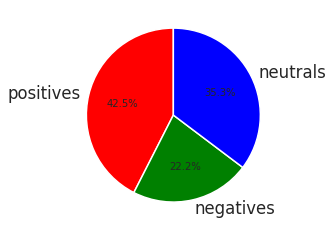

In [20]:
#import matplotlib.pyplot as plt

slices_len = [len(positives), len(negatives), len(neutrals)]
category = ['positives', 'negatives', 'neutrals']
colors = ['r', 'g', 'b']

plt.pie(slices_len, labels=category, colors=colors, startangle=90, autopct='%.1f%%')
plt.show()


In [23]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [26]:
# tokenize helper function
import string
def text_process(raw_text):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in list(raw_text) if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.lower().split() if word.lower() not in stopwords.words('english')]

def remove_words(word_list):
    remove = ['narendra','modi','...','“','”','’','…','modi’']
    return [w for w in word_list if w not in remove]
# -------------------------------------------
# tokenize message column and create a column for tokens
df = df.copy()
df['tokens'] = df['clean_comment'].apply(text_process) # tokenize style 1
df['no_modi'] = df['tokens'].apply(remove_words) #tokenize style 2
df = df.drop(['tokens'],axis=1)
df.head()

,Comment,clean_comment,category,no_modi
0,Though most of the users probably are familiar...,though most the users probably are familiar wh...,1,"[though, users, probably, familiar, reddiquett..."
1,My parents live near the border area. They sai...,parents live near the border area they said e...,1,"[parents, live, near, border, area, said, ever..."
2,Jets flying really close to Islamabad right no...,jets flying really close islamabad right now v...,1,"[jets, flying, really, close, islamabad, right..."
3,I feel for the brave wing commander. Being cap...,feel for the brave wing commander being captu...,1,"[feel, brave, wing, commander, captured, forei..."
4,I switched on Republic TV just to check out wh...,switched republic just check out what \ \ ker...,-1,"[switched, republic, check, kery, upto, arnab,..."


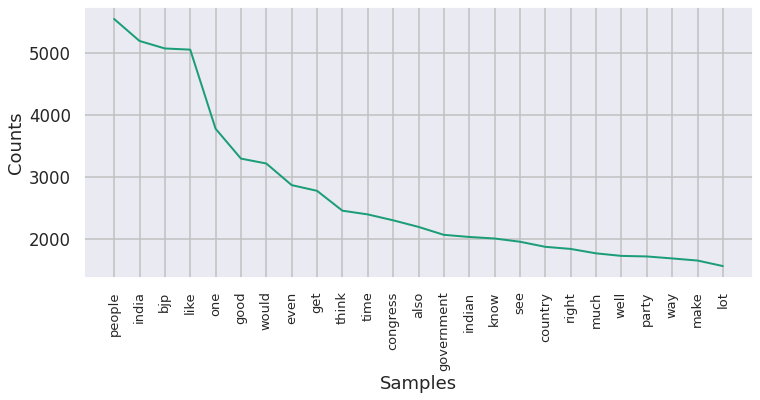

Text(0.5, 0, 'Word Rank')

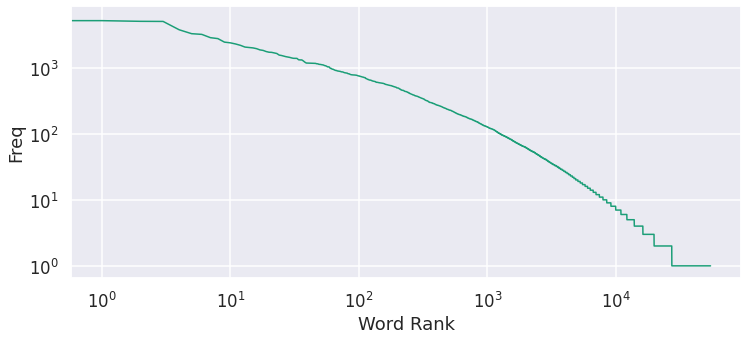

In [27]:
# plot word frequency distribution of first few words without narendra, modi
# no_modi
no_modi = []
for ls in df['no_modi']:
    words = [w for w in ls]
    for word in words:
        no_modi.append(word)
plt.figure(figsize=(12,5))
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(no_modi)
fd.plot(25,cumulative=False)

# log-log  of all words -- no_modi 
word_counts = sorted(Counter(no_modi).values(), reverse=True)
plt.figure(figsize=(12,5))
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel("Freq")
plt.xlabel("Word Rank")


In [28]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


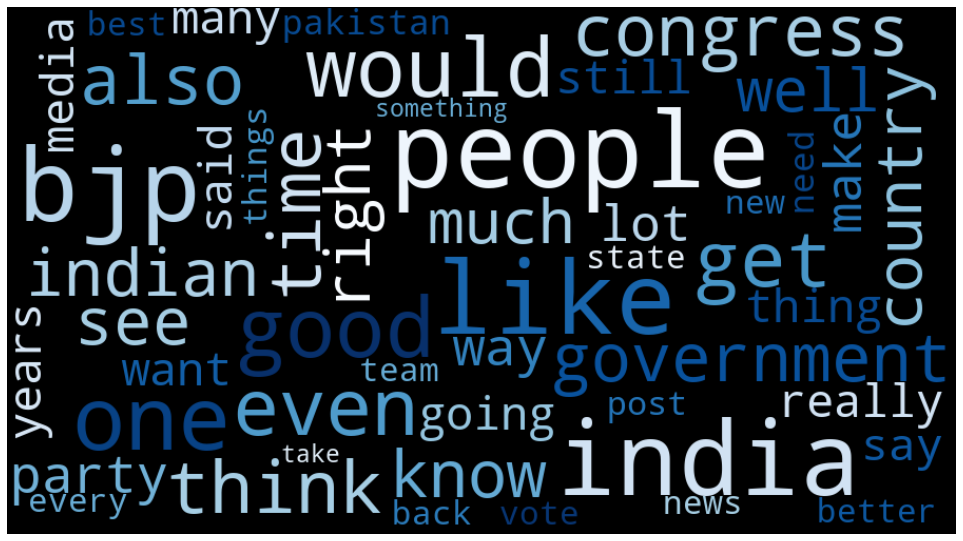

In [29]:
# split sentences to get individual words
all_words = []

for line in df['no_modi']: # try 'tokens'
    all_words.extend(line)
    
# create a word frequency dictionary
wordfreq = Counter(all_words)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=50,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate_from_frequencies(wordfreq)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [30]:
dataset = df.filter(['clean_comment','category'], axis=1)
dataset.head()


,clean_comment,category
0,though most the users probably are familiar wh...,1
1,parents live near the border area they said e...,1
2,jets flying really close islamabad right now v...,1
3,feel for the brave wing commander being captu...,1
4,switched republic just check out what \ \ ker...,-1


In [31]:
dataset.to_csv('redt_dataset.csv', index = False, sep=",", encoding="utf-8")